Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import tensorflow as tf

In [2]:
#FEC Google Dataset
print(os.listdir(r'C:\Users\ASUS\Desktop\Facial Emotion Comparison Detection\Dataset'))

['test', 'train']


Data Collection

In [3]:
train_path = r'C:\Users\ASUS\Desktop\Facial Emotion Comparison Detection\Dataset\train'
val_path = r'C:\Users\ASUS\Desktop\Facial Emotion Comparison Detection\Dataset\test'

In [4]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras.utils import to_categorical, plot_model
from tensorflow.keras import models, layers, regularizers
from tensorflow.keras import Sequential
from tensorflow import keras
from sklearn.model_selection import KFold

In [5]:
emotion_labels = sorted(os.listdir(train_path))
print(emotion_labels)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [6]:
batch_size = 64
target_size = (48,48)

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen   = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
        train_path,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical',
        shuffle=True)

val_generator = val_datagen.flow_from_directory(
        val_path,
        target_size=target_size,
        batch_size=batch_size,
        color_mode="grayscale",
        class_mode='categorical')

Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [7]:
input_shape = (48,48,1) # img_rows, img_colums, color_channels
num_classes = 7

In [8]:
print(os.listdir(r'C:\Users\ASUS\Desktop\Facial Emotion Comparison Detection\Dataset\train'))

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


Data Visualization

In [9]:
def plot_images(img_dir, top=10):
    all_img_dirs = os.listdir(img_dir)
    img_files = [os.path.join(img_dir, file) for file in all_img_dirs][:5]
  
    plt.figure(figsize=(12, 12))
  
    for idx, img_path in enumerate(img_files):
        plt.subplot(5, 5, idx+1)
        img = plt.imread(img_path)
        plt.tight_layout()         
        plt.imshow(img, cmap='gray')

Angry: 



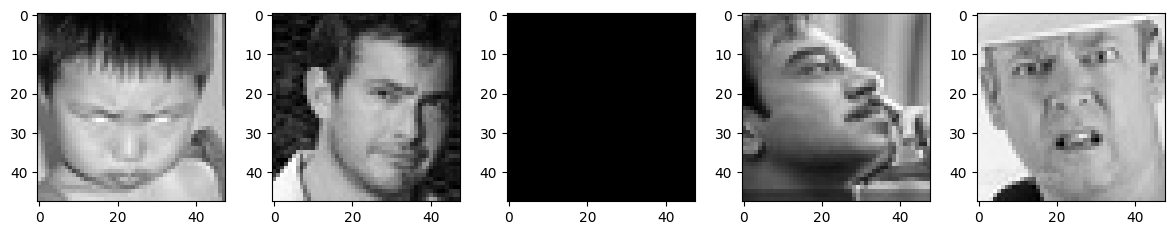

In [11]:
print('Angry: ')
print()
plot_images(train_path+'/angry')

Disgust: 



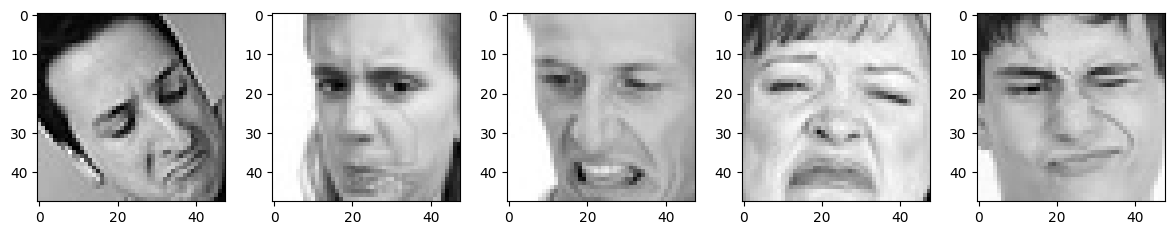

In [12]:
print('Disgust: ')
print()
plot_images(train_path+'/disgust')

Fear: 



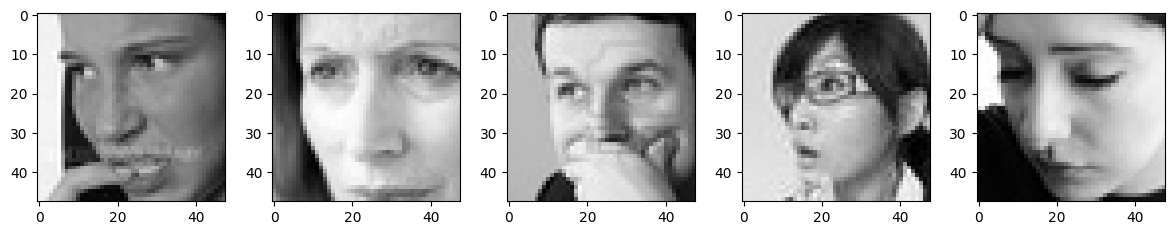

In [13]:
print('Fear: ')
print()
plot_images(train_path+'/fear')

Happy: 



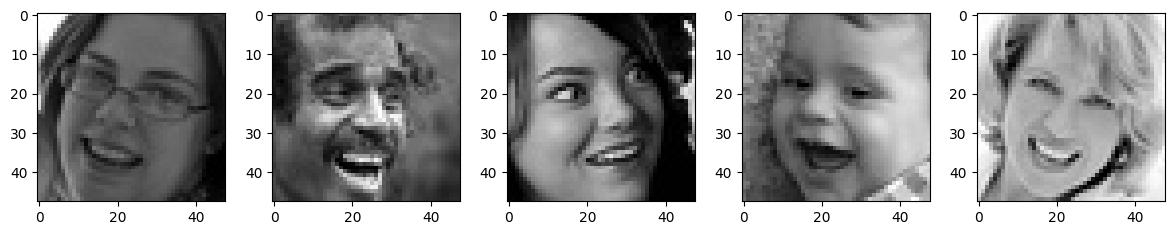

In [14]:
print('Happy: ')
print()
plot_images(train_path+'/happy')

Neutral: 



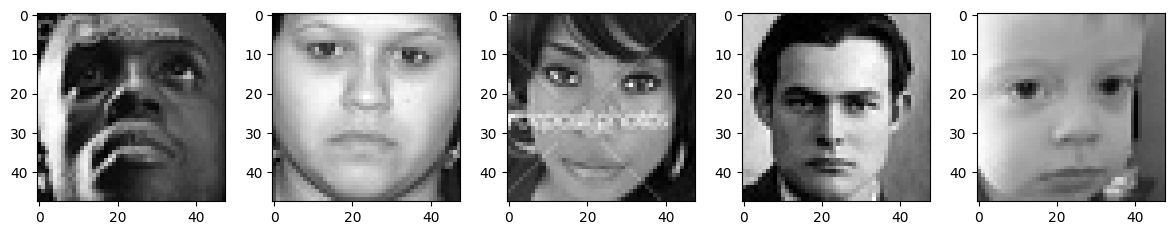

In [15]:
print('Neutral: ')
print()
plot_images(train_path+'/neutral')

Sad: 



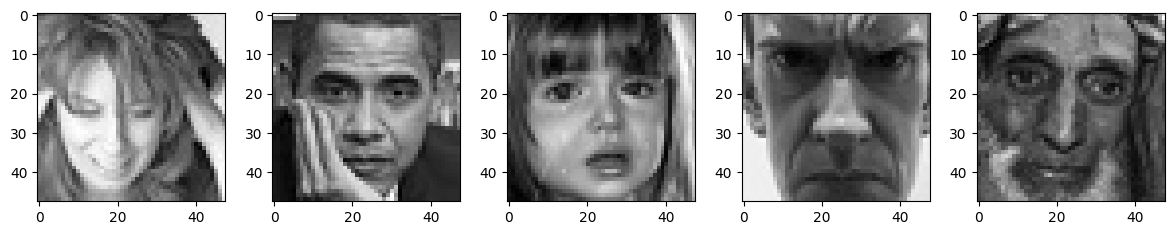

In [16]:
print('Sad: ')
print()
plot_images(train_path+'/sad')

Surprise: 



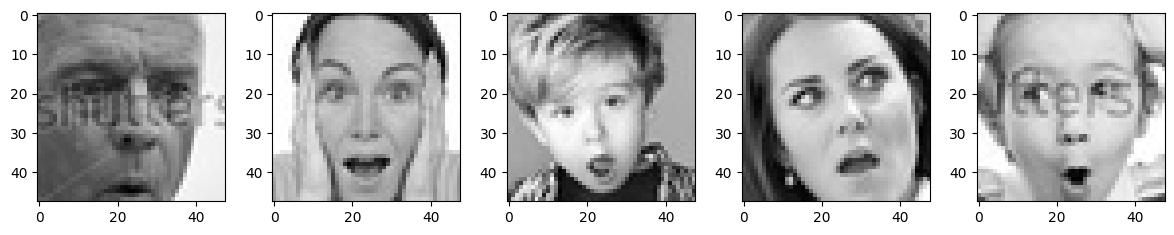

In [17]:
print('Surprise: ')
print()
plot_images(train_path+'/surprise')

Data Aqcuisition

In [18]:
emotions = os.listdir(r'C:\Users\ASUS\Desktop\Facial Emotion Comparison Detection\Dataset\train')
for emotion in emotions:
    count = len(os.listdir(rf'C:\Users\ASUS\Desktop\Facial Emotion Comparison Detection\Dataset\train\{emotion}'))
    print(f'{emotion} faces={count}')


angry faces=3995
disgust faces=436
fear faces=4097
happy faces=7215
neutral faces=4965
sad faces=4830
surprise faces=3171


In [19]:
emotions = os.listdir(r'C:\Users\ASUS\Desktop\Facial Emotion Comparison Detection\Dataset\test')
for emotion in emotions:
    count = len(os.listdir(rf'C:\Users\ASUS\Desktop\Facial Emotion Comparison Detection\Dataset\test\{emotion}'))
    print(f'{emotion} faces={count}')


angry faces=958
disgust faces=111
fear faces=1024
happy faces=1774
neutral faces=1233
sad faces=1247
surprise faces=831


Data Graphical Representation

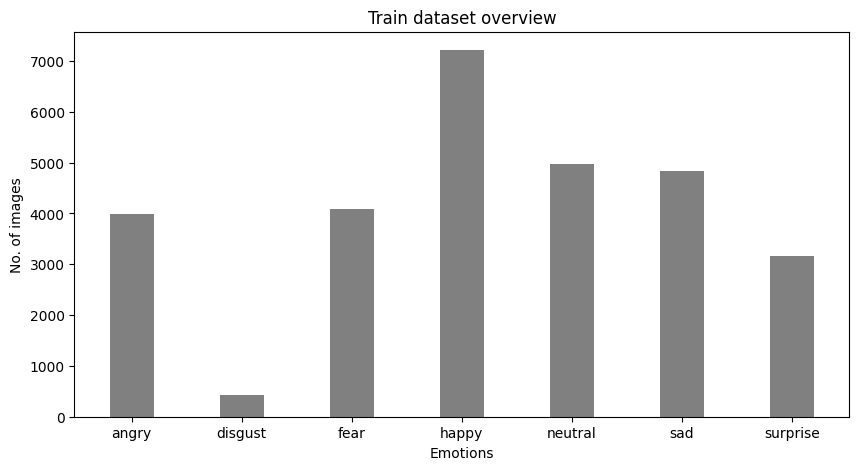

In [20]:
import os
import matplotlib.pyplot as plt

emotions = os.listdir(r'C:\Users\ASUS\Desktop\Facial Emotion Comparison Detection\Dataset\train')
values = [len(os.listdir(rf'C:\Users\ASUS\Desktop\Facial Emotion Comparison Detection\Dataset\train\{emotion}')) for emotion in emotions]

# creating the bar plot
fig = plt.figure(figsize=(10, 5))
plt.bar(emotions, values, color='grey', width=0.4)

plt.xlabel("Emotions")
plt.ylabel("No. of images")
plt.title("Train dataset overview")
plt.show()


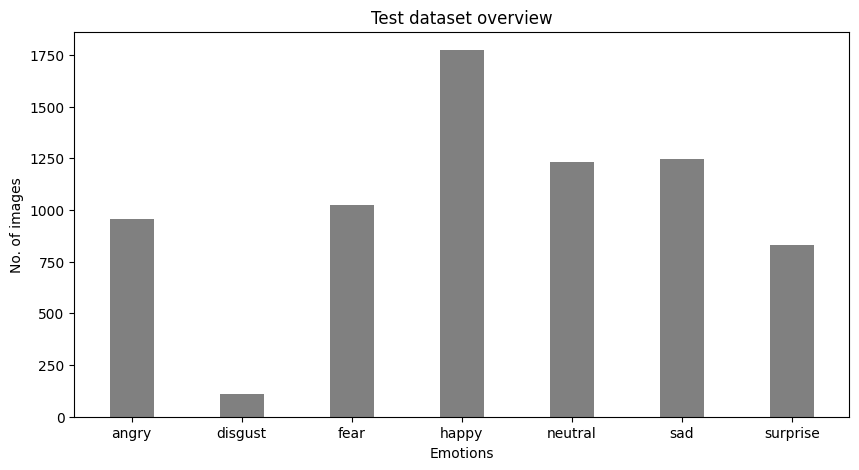

In [21]:
import os
import matplotlib.pyplot as plt

emotions = os.listdir(r'C:\Users\ASUS\Desktop\Facial Emotion Comparison Detection\Dataset\test')
values = [len(os.listdir(rf'C:\Users\ASUS\Desktop\Facial Emotion Comparison Detection\Dataset\test\{emotion}')) for emotion in emotions]

# creating the bar plot
fig = plt.figure(figsize=(10, 5))
plt.bar(emotions, values, color='grey', width=0.4)

plt.xlabel("Emotions")
plt.ylabel("No. of images")
plt.title("Test dataset overview")
plt.show()


Comparative Algorithm Analysis

1. ANN

In [22]:
# Create ImageDataGenerators
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=30,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)

# Load images from directories
train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=(64, 64),  # Adjust as needed
    batch_size=32,
    class_mode='categorical'  # Adjust depending on label format
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=(64, 64),
    batch_size=32,
    class_mode='categorical'
)


Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [34]:
# Build the ANN model
model = Sequential([
    Flatten(input_shape=(64, 64, 3)),  # Adjust input shape as per your dataset
    Dense(512, activation='relu'),
    Dropout(0.5),  # Prevent overfitting
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(len(train_generator.class_indices), activation='softmax')  # Output layer (number of classes)
])

# Compile the model
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [47]:
# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=10,  # You can increase this for better training
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)


Epoch 1/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.5156 - loss: 1.1123 - val_accuracy: 0.4860 - val_loss: 1.1231
Epoch 2/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 29us/step - accuracy: 0.6094 - loss: 0.5358 - val_accuracy: 0.3000 - val_loss: 0.6048
Epoch 3/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 16s 34ms/step - accuracy: 0.5328 - loss: 1.1060 - val_accuracy: 0.4814 - val_loss: 1.1278
Epoch 4/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 31us/step - accuracy: 0.5469 - loss: 0.5520 - val_accuracy: 0.5000 - val_loss: 0.5886
Epoch 5/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.5362 - loss: 1.1058 - val_accuracy: 0.4930 - val_loss: 1.1226
Epoch 6/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 34us/step - accuracy: 0.5000 - loss: 0.5563 - val_accuracy: 0.8000 - val_loss: 0.4962
Epoch 7/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.5494 - loss: 1.1004 - val_accuracy: 0.4856 - val_loss: 1.1240
Epoch 8/10
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 29us/step - accuracy: 0.6094 - loss: 0.5390 - val_

In [48]:
for epoch in range(10):  # Change to match the number of epochs
    print(f"Epoch {epoch+1}/{10}")
    print(f"Training Accuracy: {history.history['accuracy'][epoch]:.4f}")
    print(f"Validation Accuracy: {history.history['val_accuracy'][epoch]:.4f}")

Epoch 1/10
Training Accuracy: 0.5153
Validation Accuracy: 0.4860
Epoch 2/10
Training Accuracy: 0.6094
Validation Accuracy: 0.3000
Epoch 3/10
Training Accuracy: 0.5268
Validation Accuracy: 0.4814
Epoch 4/10
Training Accuracy: 0.5469
Validation Accuracy: 0.5000
Epoch 5/10
Training Accuracy: 0.5373
Validation Accuracy: 0.4930
Epoch 6/10
Training Accuracy: 0.5000
Validation Accuracy: 0.8000
Epoch 7/10
Training Accuracy: 0.5448
Validation Accuracy: 0.4856
Epoch 8/10
Training Accuracy: 0.6094
Validation Accuracy: 0.5000
Epoch 9/10
Training Accuracy: 0.5521
Validation Accuracy: 0.5042
Epoch 10/10
Training Accuracy: 0.5000
Validation Accuracy: 0.6000


2. CNN

In [26]:
import os
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

In [27]:
train_path = r'C:\Users\ASUS\Desktop\Facial Emotion Comparison Detection\Dataset\train'
val_path = r'C:\Users\ASUS\Desktop\Facial Emotion Comparison Detection\Dataset\test'
emotion_labels = sorted(os.listdir(train_path))
print(emotion_labels)

batch_size = 64
target_size = (48, 48)

train_datagen = ImageDataGenerator(rescale=1./255)
val_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_path,
    target_size=target_size,
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical',
    shuffle=True
)

val_generator = val_datagen.flow_from_directory(
    val_path,
    target_size=target_size,
    batch_size=batch_size,
    color_mode="grayscale",
    class_mode='categorical'
)

input_shape = (48, 48, 1)  # Image dimensions: 48x48 pixels with 1 color channel (grayscale)
num_classes = len(emotion_labels)  # Number of emotion classes


['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']
Found 28709 images belonging to 7 classes.
Found 7178 images belonging to 7 classes.


In [28]:
model = Sequential([
    Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
    MaxPooling2D((2, 2)),
    
    Conv2D(64, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(128, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Conv2D(256, (3, 3), activation='relu'),
    MaxPooling2D((2, 2)),
    
    Flatten(),
    
    Dense(512, activation='relu'),
    Dropout(0.5),
    
    Dense(num_classes, activation='softmax')  # Output layer for multi-class classification
])

model.summary()


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 46, 46, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 23, 23, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 21, 21, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 10, 10, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 2, 2, 256)      │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 1, 1, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 512)            │       131,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 512)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         3,591 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 523,015 (2.00 MB)

 Trainable params: 523,015 (2.00 MB)

 Non-trainable params: 0 (0.00 B)

In [29]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

val_datagen = ImageDataGenerator(rescale=1./255)


In [30]:
model.compile(optimizer=Adam(), loss='categorical_crossentropy', metrics=['accuracy'])


In [31]:
history = model.fit(
    train_generator,
    steps_per_epoch=train_generator.samples // train_generator.batch_size,
    epochs=50,  # You can increase this for better training
    validation_data=val_generator,
    validation_steps=val_generator.samples // val_generator.batch_size
)


Epoch 1/50


C:\Users\ASUS\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


448/448 ━━━━━━━━━━━━━━━━━━━━ 31s 64ms/step - accuracy: 0.2451 - loss: 1.8198 - val_accuracy: 0.4054 - val_loss: 1.5404
Epoch 2/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 93us/step - accuracy: 0.3594 - loss: 0.8373 - val_accuracy: 0.5000 - val_loss: 0.6260
Epoch 3/50


c:\Users\ASUS\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


448/448 ━━━━━━━━━━━━━━━━━━━━ 28s 61ms/step - accuracy: 0.4115 - loss: 1.5009 - val_accuracy: 0.4909 - val_loss: 1.3283
Epoch 4/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 39us/step - accuracy: 0.5938 - loss: 0.6145 - val_accuracy: 0.4000 - val_loss: 0.6404
Epoch 5/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 30s 66ms/step - accuracy: 0.4949 - loss: 1.3097 - val_accuracy: 0.5149 - val_loss: 1.2581
Epoch 6/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 47us/step - accuracy: 0.4531 - loss: 0.6921 - val_accuracy: 0.4000 - val_loss: 0.7026
Epoch 7/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 30s 66ms/step - accuracy: 0.5444 - loss: 1.2111 - val_accuracy: 0.5512 - val_loss: 1.1860
Epoch 8/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 37us/step - accuracy: 0.5781 - loss: 0.5722 - val_accuracy: 0.7000 - val_loss: 0.4606
Epoch 9/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 28s 62ms/step - accuracy: 0.5676 - loss: 1.1368 - val_accuracy: 0.5573 - val_loss: 1.1556
Epoch 10/50
448/448 ━━━━━━━━━━━━━━━━━━━━ 0s 38us/step - accuracy: 0.5938 - loss: 0.5374 - val_accuracy: 

In [33]:
# Print accuracy scores after training
print("Training Accuracy:", history.history['accuracy'][-1])  # Final training accuracy
print("Validation Accuracy:", history.history['val_accuracy'][-1])  # Final validation accuracy

Training Accuracy: 0.890625
Validation Accuracy: 0.699999988079071


3. SVM

In [40]:
num_epochs = 20
number_of_classes = 7


In [42]:
model = Sequential()

# First Convolutional Layer
model.add(layers.Conv2D(
    filters=32, kernel_size=3, strides=2, padding="same", 
    activation="relu", input_shape=input_shape))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))

# Second Convolutional Layer
model.add(layers.Conv2D(
    filters=32, kernel_size=3, padding="same", 
    activation="relu"))
model.add(layers.MaxPool2D(pool_size=(2, 2), strides=2))

# Flatten and Dense Layers
model.add(layers.Flatten())
model.add(layers.Dense(128, activation="relu"))

# Output Layer with Softmax for Classification
model.add(layers.Dense(
    number_of_classes, kernel_regularizer=regularizers.l2(0.01), 
    activation="softmax"))

# Compile the Model
model.compile(optimizer="adam", loss="squared_hinge", metrics=['accuracy'])

In [43]:
# Display Model Summary
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_8 (Conv2D)               │ (None, 24, 24, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_8 (MaxPooling2D)  │ (None, 12, 12, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 12, 12, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_9 (MaxPooling2D)  │ (None, 6, 6, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 1152)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 128)            │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_10 (Dense)                │ (None, 7)              │           903 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 158,055 (617.40 KB)

 Trainable params: 158,055 (617.40 KB)

 Non-trainable params: 0 (0.00 B)

In [44]:
# Define the number of steps per epoch for training and validation
STEP_SIZE_TRAIN = len(train_generator)  # Number of batches in the training generator
STEP_SIZE_VAL = len(val_generator)      # Number of batches in the validation generator

# Train the Model
history = model.fit(
    x=train_generator,
    steps_per_epoch=STEP_SIZE_TRAIN,
    epochs=num_epochs,
    batch_size=batch_size,
    validation_data=val_generator,
    validation_steps=STEP_SIZE_VAL
)


Epoch 1/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 17s 35ms/step - accuracy: 0.2455 - loss: 1.2576 - val_accuracy: 0.3660 - val_loss: 1.1780
Epoch 2/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 43us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 3/20


c:\Users\ASUS\anaconda3\Lib\contextlib.py:158: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(value)


449/449 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.3722 - loss: 1.1742 - val_accuracy: 0.3569 - val_loss: 1.1752
Epoch 4/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 20us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 5/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 16s 36ms/step - accuracy: 0.3985 - loss: 1.1610 - val_accuracy: 0.4214 - val_loss: 1.1513
Epoch 6/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 22us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 7/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.4250 - loss: 1.1498 - val_accuracy: 0.4292 - val_loss: 1.1476
Epoch 8/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 25us/step - accuracy: 0.0000e+00 - loss: 0.0000e+00 - val_accuracy: 0.0000e+00 - val_loss: 0.0000e+00
Epoch 9/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 16s 35ms/step - accuracy: 0.4425 - loss: 1.1429 - val_accuracy: 0.4408 - val_loss: 1.1425
Epoch 10/20
449/449 ━━━━━━━━━━━━━━━━━━━━ 0s 20us/step - 

In [46]:
# Use the 'evaluate' method instead of 'evaluate_generator'
svm_score = model.evaluate(val_generator, steps=STEP_SIZE_VAL)

# The first element in 'svm_score' is usually the loss, and the second is the accuracy
accuracy = svm_score[1]

print("SVM Model Accuracy: {:.4f}".format(accuracy))


113/113 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.4707 - loss: 1.1283
SVM Model Accuracy: 0.4767


4. KNN

In [52]:
import os
import cv2
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Define the paths
train_path = r'C:\Users\ASUS\Desktop\Facial Emotion Comparison Detection\Dataset\train'
val_path = r'C:\Users\ASUS\Desktop\Facial Emotion Comparison Detection\Dataset\test'

# Get the list of emotion labels (class names)
emotion_labels = sorted(os.listdir(train_path))
print(emotion_labels)

['angry', 'disgust', 'fear', 'happy', 'neutral', 'sad', 'surprise']


In [60]:
# Preprocess images and extract features (for simplicity, we'll use resized images as features)
def load_images_and_labels(dataset_path, labels):
    images = []
    labels_list = []
    for label in labels:
        label_path = os.path.join(dataset_path, label)
        for image_name in os.listdir(label_path):
            image_path = os.path.join(label_path, image_name)
            img = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
            img_resized = cv2.resize(img, (64, 64))  # Resize image
            images.append(img_resized.flatten())  # Flatten image into a vector
            labels_list.append(label)
    return np.array(images), np.array(labels_list)

In [61]:
# Load training and validation data
train_images, train_labels = load_images_and_labels(train_path, emotion_labels)
val_images, val_labels = load_images_and_labels(val_path, emotion_labels)

In [62]:
# Train KNN model
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(train_images, train_labels)

KNeighborsClassifier(n_neighbors=3)

In [63]:
# Predict on validation set
val_predictions = knn.predict(val_images)

In [64]:
# Calculate accuracy
accuracy = accuracy_score(val_labels, val_predictions)
print(f"Accuracy of KNN model: {accuracy * 100:.2f}%")

Accuracy of KNN model: 33.98%


In [58]:
print(X_val.shape)

(7178, 2304)


Performance Evaluation Comparison

In [1]:
import pandas as pd

# Data for each model
data = {
    'Model': ['ANN', 'CNN', 'SVM', 'KNN','CNN_CBAM'],
    'Validation Accuracy': [0.6000, 0.6999, 0.4767, 0.3398, 0.7433],
    
}

# Create a DataFrame from the data
df = pd.DataFrame(data)

# Display the table
print(df)


      Model  Validation Accuracy
0       ANN               0.6000
1       CNN               0.6999
2       SVM               0.4767
3       KNN               0.3398
4  CNN_CBAM               0.7433


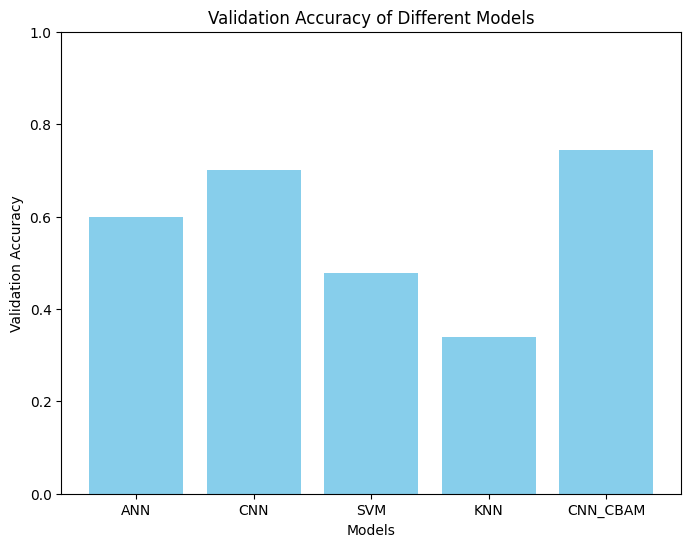

In [2]:
import matplotlib.pyplot as plt

# Data
models = ['ANN', 'CNN', 'SVM', 'KNN', 'CNN_CBAM']
validation_accuracies = [0.6000, 0.6999, 0.4767, 0.3398, 0.7433]

# Plot
plt.figure(figsize=(8, 6))
plt.bar(models, validation_accuracies, color='skyblue')
plt.xlabel('Models')
plt.ylabel('Validation Accuracy')
plt.title('Validation Accuracy of Different Models')
plt.ylim(0, 1)  # Set the y-axis range from 0 to 1 for better visualization
plt.show()
